# Possum Regression

    Possum age prediction usin liner regression 


import libraries

In [629]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

Take a look at the data 

In [630]:
data = pd.read_csv("possum.csv")
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [631]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [632]:
# there is 3 null value 
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [633]:
# fill NaN values with ceil mean of columns
data.fillna((data.mean(numeric_only=True).apply(np.round)),inplace=True)

In [634]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [635]:
data.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.836538,92.602885,56.883654,87.088462,37.009615,68.454808,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.890757,3.573349,3.113426,4.310549,1.959518,4.374149,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


Try to reduce Skewness by log transformation 

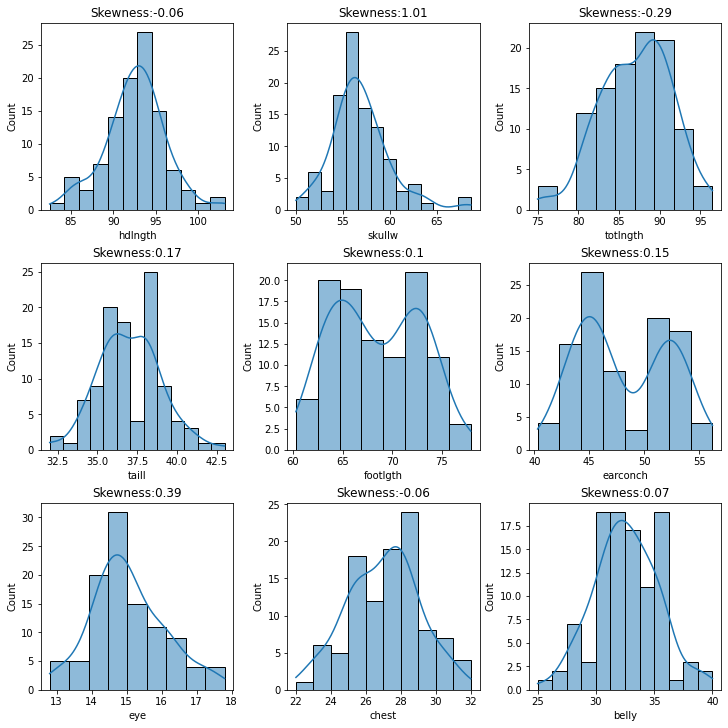

In [636]:
# Skewness of features

numeric_features = [
'hdlngth',
'skullw',
'totlngth',
'taill',
'footlgth',
'earconch',
'eye',
'chest',
'belly']

fig, ax = plt.subplots(3,3, figsize=(10,10), constrained_layout=True)
# returns contiguous flattened array of ax 
ax = ax.ravel()


# row, column - (1,1),-> (1,'hdlngth'), (1,2) -> (1 ,'skullw')
# It's accessing the list
for index, value in enumerate(numeric_features):
    sns.histplot(x=value, data=data, ax=ax[index], kde=True)
    ax[index].set_title(f"Skewness:{np.around(data[value].skew(axis=0),2)}")

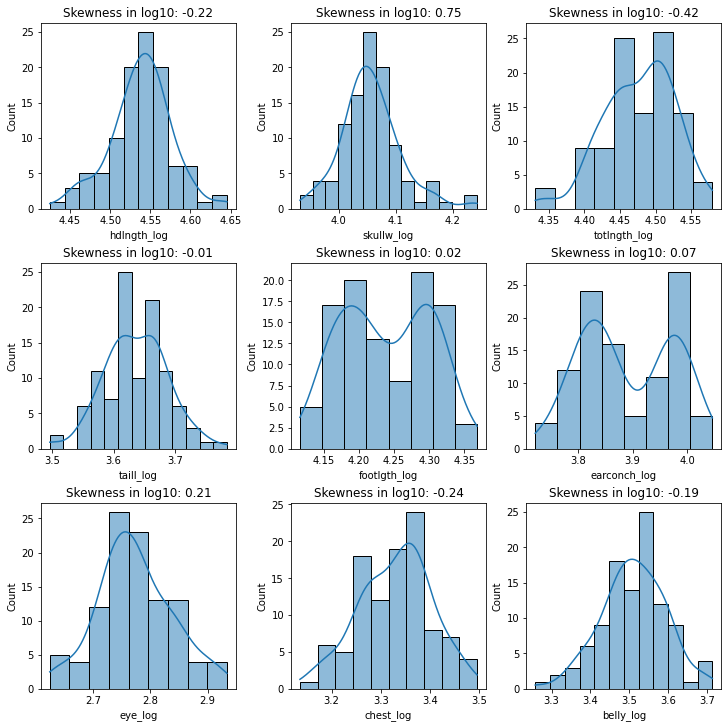

In [637]:
# skewness values after log transformation 
fig, ax = plt.subplots(3,3, figsize=(10,10), constrained_layout=True)
ax = ax.ravel()


for index, value in enumerate(numeric_features):
    log = (f'{value}_log')
    data[log] = data[value].apply(lambda x: np.log(x+1))
    sns.histplot(x=log, data=data, ax=ax[index], kde=True)
    ax[index].set_title(f"Skewness in log10: {np.around(data[log].skew(axis=0),2)}")

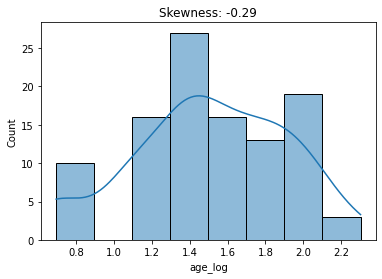

In [638]:
# log transformation
data["age_log"] = data['age'].apply(lambda x: np.log(x+1))
sns.histplot(x='age_log', data=data, kde=True)
plt.title('Skewness: {}'.format(np.around(data['age_log'].skew(axis=0),2)))
plt.show()

Correlation

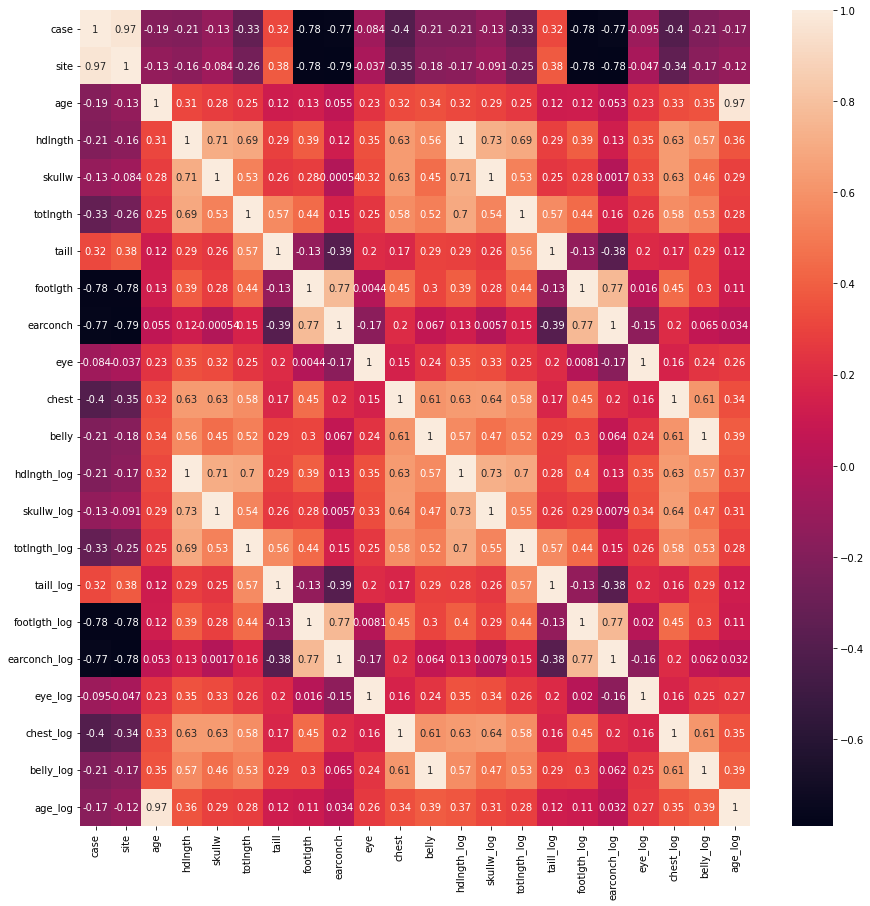

In [639]:
# earconch and footlgth = 0.78305
# skullw and hdlngth = 0.710827
#  age and chest = 0.631498	
# age and belly = 0.562663
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [640]:
# we dont need case column 
data.drop(columns='case',inplace=True)

Explore cotegorical features (site,pop,sex)

In [641]:
# compare feature averages by gender 
# gender did not make much difference 
male=data[data['sex']=='m'].mean(numeric_only=True)
female=data[data['sex']=='f'].mean(numeric_only=True)

sex_avg_df=pd.concat([male,female],axis=1,keys=['male_avg','female_avg'])

sex_avg_df


,male_avg,female_avg
site,4.081967,2.976744
age,3.737705,3.976744
hdlngth,92.922951,92.148837
skullw,57.091803,56.588372
totlngth,86.511475,87.906977
taill,36.942623,37.104651
footlgth,68.009836,69.086047
earconch,47.816393,48.576744
eye,15.211475,14.811628
chest,26.762295,27.337209


In [642]:
# compare feature averages by population category 
# population did not make much difference
vic=data[data['Pop']=='Vic'].mean(numeric_only=True)
other=data[data['Pop']=='other'].mean(numeric_only=True)

pop_avg_df=pd.concat([vic,other],axis=1,keys=['vic_avg','other_avg'])

pop_avg_df

,vic_avg,other_avg
site,1.282609,5.482759
age,4.021739,3.689655
hdlngth,92.597826,92.606897
skullw,56.654348,57.065517
totlngth,87.467391,86.787931
taill,35.934783,37.862069
footlgth,72.302174,65.403448
earconch,52.186957,44.913793
eye,14.871739,15.184483
chest,27.445652,26.646552


One Hot Encode (pop,site,sex)

In [643]:
#return pop ,sex,and site values to binary numbers using oneHotEncoder 
from sklearn.preprocessing import OneHotEncoder

# for sex 
encode_sex=OneHotEncoder()
sex_binary=encode_sex.fit_transform(data[['sex']])
sex_binary=sex_binary.toarray()
print(encode_sex.categories_)

# for pop 
encode_pop=OneHotEncoder()
pop_binary=encode_pop.fit_transform(data[['Pop']])
pop_binary=pop_binary.toarray()
print(encode_pop.categories_)

# for site 
encode_site=OneHotEncoder()
site_binary=encode_site.fit_transform(data[['site']])
site_binary=site_binary.toarray()
print(encode_site.categories_)


[array(['f', 'm'], dtype=object)]
[array(['Vic', 'other'], dtype=object)]
[array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]


In [644]:
type(encode_site.categories_)
print(encode_pop.categories_[0])

['Vic' 'other']


In [645]:
# new data include sex and pop columns as binary 
sex_binary=pd.DataFrame(sex_binary,columns=encode_sex.categories_[0])
pop_binary=pd.DataFrame(pop_binary,columns=encode_pop.categories_[0])
site_binary=pd.DataFrame(site_binary,columns=encode_site.categories_[0])
# merge with data 
data=pd.concat([data,sex_binary,pop_binary,site_binary],axis=1)

# drop sex and pop columns 
data.drop(columns=['Pop','sex','site'],inplace=True)
data.sample(10)

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,...,m,Vic,other,1,2,3,4,5,6,7
24,3.0,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31,4.0,94.3,56.7,94.0,39.0,74.8,52.0,14.9,28.0,34.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
86,2.0,98.5,60.7,93.0,41.5,71.7,46.8,15.0,26.0,36.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37,7.0,92.4,56.0,80.5,35.5,68.4,49.5,15.9,27.0,30.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52,3.0,93.1,58.1,91.0,38.0,67.4,46.0,16.5,26.0,33.5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
57,3.0,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,2.0,91.3,57.7,88.0,39.0,63.1,47.0,14.4,26.0,30.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,2.0,89.6,58.0,87.5,38.0,66.7,43.5,16.0,25.5,31.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
85,3.0,88.2,53.2,86.5,38.5,60.3,43.7,13.6,26.0,31.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Age distribution

3.0    27
2.0    16
4.0    16
5.0    13
6.0    12
1.0    10
7.0     7
9.0     2
8.0     1
Name: age, dtype: int64


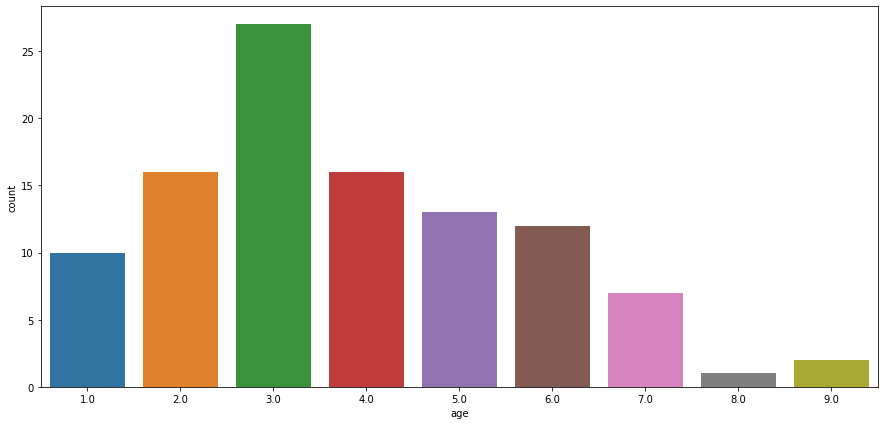

In [646]:
# age distribution 
plt.figure(figsize=(15,7))
sns.countplot(x='age',data=data)
print(data.age.value_counts())
plt.show()

Create train and test sets

In [647]:
#create train test set with regular features 
columns_regular=['hdlngth',       'skullw',     'totlngth',
                 'taill',     'footlgth',     'earconch',          'eye',
                 'chest',      'belly',       'f',             'm',
                 'Vic',         'other',       1,2,3,4,5,6,7  ]

x_regular=np.array(data[columns_regular])
y_regular=np.array(data['age'])

# create train test set with log transformed  features
columns_log=[ 'hdlngth_log',     'skullw_log', 'totlngth_log', 
             'taill_log',    'footlgth_log',    'earconch_log', 'eye_log', 
             'chest_log',    'belly_log',       'f',            'm',
             'Vic',          'other',            1,2,3,4,5,6,7]

x_log=np.array(data[columns_log])
y_log=np.array(data['age_log'])


In [648]:
# age is important for us we need to split ages equaly for train and test set 
# first we need to make categorys by age 
data['age_cat']=pd.cut(data.age,bins=[0,1,2,3,4,5,6,np.inf],labels=[1,2,3,4,5,6,7])
data['age_cat'].value_counts()

3    27
2    16
4    16
5    13
6    12
1    10
7    10
Name: age_cat, dtype: int64

In [649]:
# create a function which apply Stratified Shuffle Split
from sklearn.model_selection import StratifiedShuffleSplit

def Stratified_Shuffle_Split(x,y,data,category,test_size=.2):
    sss=StratifiedShuffleSplit(n_splits=4,test_size=test_size,random_state=42)

    for train , test in sss.split(data,data[category]):

        x_train,x_test= x[train],x[test]
        y_train,y_test= y[train],y[test]
        
    return x_train,x_test,y_train,y_test

In [650]:
# create model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def Linear_Regression(x_train,x_test,y_train,y_test,is_log_traformed=False):
    reg=LinearRegression()
    reg.fit(x_train,y_train)

    predictions = reg.predict(x_test)

    # if the data is log transformed than return them to actual value 
    if (is_log_traformed):
        y_test = np.exp(y_test,)-1
        predictions = np.exp(predictions)-1

    print(f'Score:{reg.score(x_test,y_test)}')
    print(f'RMSE:{np.sqrt(mean_squared_error(y_test, predictions))}')
    print(f'MSE:{mean_squared_error(y_test, predictions)}')
    print(f'Standard Deviation of Age: {np.around(data.age.std(),3)}')

    return predictions,y_test

In [651]:
print('Linear regression with log transformed features')
x_train,x_test,y_train,y_test=Stratified_Shuffle_Split(x_log,y_log,data,'age_cat',0.2)
predictions,real_values= Linear_Regression(x_train,x_test,y_train,y_test,True)

df=pd.DataFrame(data=np.concatenate((predictions.reshape(-1,1),real_values.reshape(-1,1)),axis=1),columns=['Prediction','Real Value'])
df.head(10)

Linear regression with log transformed features
Score:-1.4178364020788412
RMSE:1.6629259236428644
MSE:2.765322627523474
Standard Deviation of Age: 1.891


,Prediction,Real Value
0,2.876841,2.0
1,2.503551,3.0
2,2.704741,3.0
3,2.939620,4.0
4,3.330326,4.0
5,4.299045,5.0
6,3.187866,3.0
7,1.719160,1.0
8,4.377534,6.0
9,2.514504,3.0


In [652]:
print('Linear regression with regular features')
x_train,x_test,y_train,y_test=Stratified_Shuffle_Split(x_regular,y_regular,data,'age_cat',0.2)
predictions,real_values= Linear_Regression(x_train,x_test,y_train,y_test,False)

df=pd.DataFrame(data=np.concatenate((predictions.reshape(-1,1),real_values.reshape(-1,1)),axis=1),columns=['Prediction','Real Value'])
df.head(10)

Linear regression with regular features
Score:0.2618004637237239
RMSE:1.68293665116531
MSE:2.8322757718355085
Standard Deviation of Age: 1.891


,Prediction,Real Value
0,3.070103,2.0
1,2.249405,3.0
2,2.845900,3.0
3,3.261678,4.0
4,3.844581,4.0
5,3.981018,5.0
6,3.565628,3.0
7,2.023361,1.0
8,4.701099,6.0
9,2.925437,3.0


In [653]:
from sklearn.linear_model import Lasso

x_train,x_test,y_train,y_test=Stratified_Shuffle_Split(x_regular,y_regular,data,'age_cat',0.2)

lasso_reg=Lasso()
lasso_reg = Lasso(alpha = 0.1,)
lasso_reg.fit(x_train,y_train),
ridge_predict = lasso_reg.predict(x_test)

print('Lasso with regular features')
print('Lasso score: ',lasso_reg.score(x_test,y_test))
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, ridge_predict))}')
print(f'MSE:{mean_squared_error(y_test, ridge_predict)}')


Lasso with regular features
Lasso score:  0.16216790142465565
RMSE:1.7929136845504472
MSE:3.21453948024826


In [654]:
from sklearn.linear_model import Lasso

x_train,x_test,y_train,y_test=Stratified_Shuffle_Split(x_log,y_log,data,'age_cat',0.2)
lasso_reg=Lasso()
lasso_reg = Lasso(alpha = 0.1,)
lasso_reg.fit(x_train,y_train),

ridge_predict = lasso_reg.predict(x_test)

ridge_predict=np.exp(ridge_predict)-1
y_test=np.exp(y_test)-1

print('Lasso with log transformed features')
print('Lasso score: ',lasso_reg.score(x_test,y_test))
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, ridge_predict))}')
print(f'MSE:{mean_squared_error(y_test, ridge_predict)}')

Lasso with log transformed features
Lasso score:  -1.4523580093429587
RMSE:1.9973645343923707
MSE:3.989465083248452
